# SpaceX Falcon 9 Classification Project

This notebook performs classification using various machine learning models on the SpaceX Falcon 9 dataset.

## Import Libraries and Define Auxiliary Functions

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [3]:
# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    "This function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'land'])
    plt.show()


## Load the Data

In [4]:
import pandas as pd

# Load dataset part 2
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(url1)

# Load dataset part 3
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
X = pd.read_csv(url2)

data.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## TASK 1: Create Target Variable `Y`
Create a NumPy array from the column `Class` in `data`, and assign it to the variable `Y`.

In [5]:
Y = data['Class'].to_numpy()


## TASK 2: Standardize the Data
Use `StandardScaler` to scale the feature dataset `X`.

In [6]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)


## TASK 3: Split Data into Train and Test Sets
Split the data using `train_test_split` with `test_size=0.2` and `random_state=2`.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
Y_test.shape


(18,)

## TASK 4: Logistic Regression with GridSearchCV
Use logistic regression and find the best hyperparameters using cross-validation.

In [8]:
parameters = {"C":[0.01,0.1,1], "penalty":["l2"], "solver":["lbfgs"]}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("Tuned hyperparameters :", logreg_cv.best_params_)
print("Accuracy :", logreg_cv.best_score_)


Tuned hyperparameters : {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8464285714285713


## TASK 5: Evaluate Logistic Regression Model
Evaluate the logistic regression model on test data and display the confusion matrix.

Test set accuracy: 0.8333333333333334


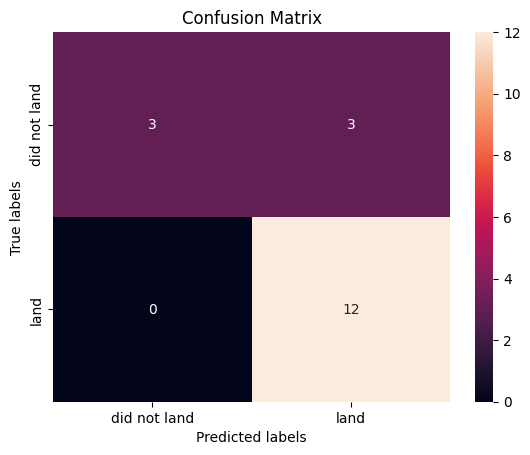

In [9]:
logreg_score = logreg_cv.score(X_test, Y_test)
print("Test set accuracy:", logreg_score)

yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


## TASK 6: Support Vector Machine (SVM) with GridSearchCV
Train an SVM model and find the best hyperparameters using GridSearchCV.

In [10]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("Tuned hyperparameters :", svm_cv.best_params_)
print("Accuracy :", svm_cv.best_score_)


Tuned hyperparameters : {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Accuracy : 0.8482142857142856


## TASK 7: Evaluate SVM Model
Evaluate the SVM model on test data and display the confusion matrix.

Test set accuracy: 0.8333333333333334


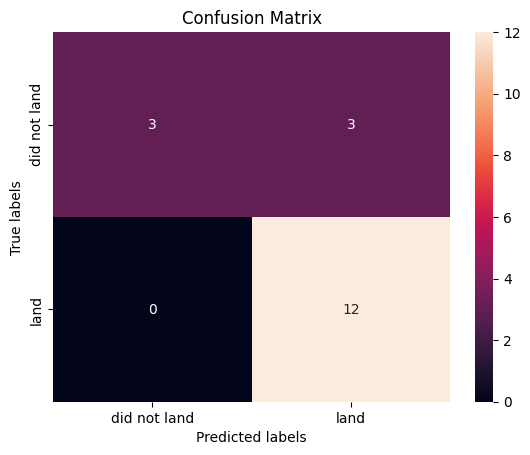

In [11]:
svm_score = svm_cv.score(X_test, Y_test)
print("Test set accuracy:", svm_score)

yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


## TASK 8: Decision Tree with GridSearchCV
Train a Decision Tree classifier and find the best hyperparameters using GridSearchCV.

In [12]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

print("Tuned hyperparameters :", tree_cv.best_params_)
print("Accuracy :", tree_cv.best_score_)


Tuned hyperparameters : {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy : 0.875


c:\Users\SAM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SAM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\SAM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Us

## TASK 9: Evaluate Decision Tree Model
Evaluate the Decision Tree model on test data and display the confusion matrix.

Test set accuracy: 0.6666666666666666


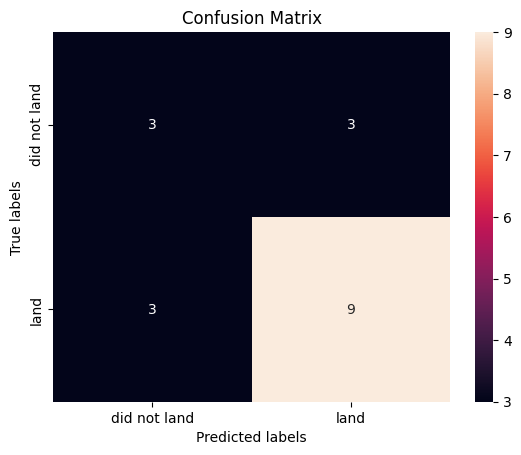

In [13]:
tree_score = tree_cv.score(X_test, Y_test)
print("Test set accuracy:", tree_score)

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


## TASK 10: K-Nearest Neighbors (KNN) with GridSearchCV
Train a KNN classifier and find the best hyperparameters using GridSearchCV.

In [14]:
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p':[1,2]}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("Tuned hyperparameters :", knn_cv.best_params_)
print("Accuracy :", knn_cv.best_score_)


Tuned hyperparameters : {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy : 0.8482142857142858


## TASK 11: Evaluate KNN Model
Evaluate the KNN model on test data and display the confusion matrix.

Test set accuracy: 0.8333333333333334


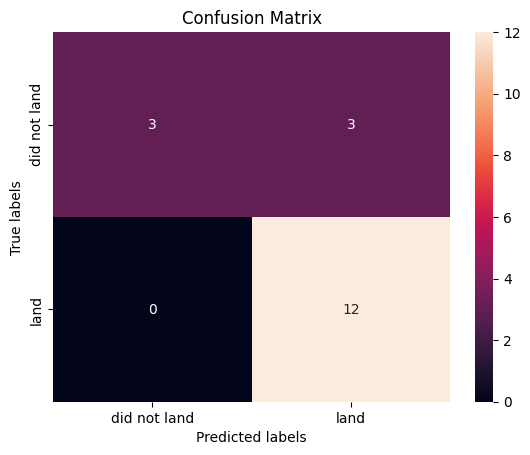

In [15]:
knn_score = knn_cv.score(X_test, Y_test)
print("Test set accuracy:", knn_score)

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


## TASK 12: Compare All Classifiers
Compare the test accuracy of all classifiers and determine the best one.

In [16]:
print("Logistic Regression Test Accuracy:", logreg_score)
print("SVM Test Accuracy:", svm_score)
print("Decision Tree Test Accuracy:", tree_score)
print("KNN Test Accuracy:", knn_score)

accuracies = {
    "Logistic Regression": logreg_score,
    "SVM": svm_score,
    "Decision Tree": tree_score,
    "KNN": knn_score
}
best_model = max(accuracies, key=accuracies.get)
print("Best performing model:", best_model)


Logistic Regression Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.8333333333333334
Decision Tree Test Accuracy: 0.6666666666666666
KNN Test Accuracy: 0.8333333333333334
Best performing model: Logistic Regression
